### k-nearest neighbors algorithm

It is a algorithm for classification and regresion. 
It takes input data and chooses which group this data comes from.

In this notebook I use [iris flower dataset](https://archive.ics.uci.edu/ml/datasets/iris). This is dataset has feature vector for each flower in dataset. 

Dimensions:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm

Classes of flowers:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [2]:
iris = datasets.load_iris()
print('x shape is {}'.format(iris.data.shape))
print('y shape is {}'.format(iris.target.shape))

x shape is (150, 4)
y shape is (150,)


In [3]:
# set X(features - only two) and target -> y
X = iris.data[:, :2]
y = iris.target

In [4]:
# this function I share and description in other notebooks
def distance(x, y):
    x = np.array(x, dtype=np.float).ravel()
    y = np.array(y, dtype=np.float).ravel()
    distance = np.linalg.norm(x - y)
    return distance

def angle(x, y):
    angle = np.arccos(np.dot(x, y)  / (np.sqrt(np.dot(x.T, x) * np.dot(y.T, y))))
    return angle

def pairwise_distance_matrix(X, Y):
    N, D = X.shape
    M, _ = Y.shape
    distance_matrix = np.zeros((N, M), dtype=np.float)
    for i in range(N):
        for j in range(M):
            distance_matrix[i,j] = distance(X[i], Y[j])
    return distance_matrix

In [5]:
def KNN(k, X, y, Xtest):
    N, D = X.shape
    M, _ = Xtest.shape
    num_classes = len(np.unique(y))
    
    #  compute distance with all flowers
    distance = np.zeros((N, M)) 
    distance = pairwise_distance_matrix(X, Xtest) # EDIT THIS to use "pairwise_distance_matrix"

    #  find indices for the k closest flowers
    idx = np.argsort(distance.T, axis=1)[:, :K]
    
    #  vote for the major class
    ypred = np.zeros((M, num_classes))

    for m in range(M):
        klasses = y[idx[m]]    
        for k in np.unique(klasses):
            ypred[m, k] = len(klasses[klasses == k]) / K

    return np.argmax(ypred, axis=1)

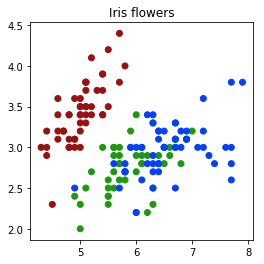

In [6]:
# visualize
from matplotlib.colors import ListedColormap

cmap_bold  = ListedColormap(['#981010', '#1E9810', '#043FFF'])

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold);
ax.set(title='Iris flowers');

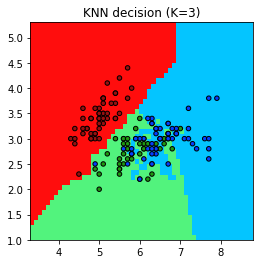

In [7]:
cmap_light = ListedColormap(['#FF0D0D', '#52F37D', '#04C5FF'])

K = 3

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

step = 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

ypred = []
data = np.array([xx.ravel(), yy.ravel()]).T
ypred = KNN(K, X, y, data)

fig, ax = plt.subplots(figsize=(4,4))

ax.pcolormesh(xx, yy, ypred.reshape(xx.shape), cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20);
ax.set(title='KNN decision (K={})'.format(K));

For more information: http://cs231n.github.io/classification/#knn